# Uber Supply-Demand Gap

## SAAKSHI SRIVASTAVA

## RK20SSA04

## 12016982

# EXPLORING OUR DATA AND MAKING CHANGES TO IT AS PER REQUIREMENT

In [103]:
#IMPORTING IMPORTANT LIBRARIES FOR OUR WORK

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,date,time
import seaborn as sns

In [104]:
# IMPORTING DATA AND CHANDING TIME STAMPS FOR OUR PREFERANCE
data=pd.read_csv("Uber Request Data.csv")

In [105]:
# CHECKING THE FIRST FIVE ELEMENTS TO GET AN IDEA OF THE DATA
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [106]:
#TOTAL NO. OF ROWS AND COLUMNS
data.shape

(6745, 6)

In [107]:
#REPRESENTS TOTAL NO. OF NON NULL VALUES AND THE TYPES OF RESPECTIVE HEADERS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [108]:
data.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [109]:
# RENAMING DATA HEADERS TO USE THEM EFFICIENTLY
data=data.rename(columns={"Request id":"Request_id" ,"Pickup point": "Pickup_point","Driver id":"Driver_id" ,"Request timestamp":"Request_timestamp" ,"Drop timestamp":"Drop_timestamp"})

In [110]:
data

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [111]:
data.isnull().sum()
# IT IS VISIBLE THAT A NUMBER OF DROP TIMESTAMPS ARE EMPTY THAT IS UNFULFILLED DRIVES

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
dtype: int64

In [112]:
#CHANGING THE DATETIME STAMPS TO MAKE IT MORE ACCESSIBLE AND SO THAT WE CAN PERFORM OPERATIONS ON IT
def time(var):
    try:
        if var == ' ':
            return var
        elif '-' in var:
            return datetime.strptime(var, '%d-%m-%Y %H:%M:%S')
        elif '/' in var:
            return datetime.strptime(var, '%d/%m/%Y %H:%M')
    except Exception as e:
        print(e, var)
        
data.loc[pd.isnull(data['Drop_timestamp']), ['Drop_timestamp']] = data['Request_timestamp']

data['Request_timestamp'] = data['Request_timestamp'].apply(lambda x: time(x))
data['Drop_timestamp'] = data['Drop_timestamp'].apply(lambda x: time(x))

In [113]:
data

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,2016-07-15 23:49:03
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,2016-07-15 23:50:05
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,2016-07-15 23:52:06
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,2016-07-15 23:54:39


In [114]:
data.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [115]:
#TIMINGS OF THE DAY DISTRIBUTES AS PER MORNING, AFTERNOON, EVENING, NIGHT
def mn(x):
    if x in range(4,12):
        return 'Morning'
    if x in range(12,17):
        return 'Afternoon'
    if x in range(17,20):
        return 'Evening'
    if x in range(20,24):
        return 'Night'
    if x in range(0,4):
        return 'Night'
       
        
data["Slot"]=data["Request_timestamp"].dt.hour.apply(lambda x: mn(x))

In [116]:
# CREATING NEW HOUR COLUMN FOR PREFERANCE
data['Hour'] = data['Request_timestamp'].dt.hour

In [117]:
data["Slot"].unique()

array(['Morning', 'Evening', 'Night', 'Afternoon'], dtype=object)

In [118]:
data

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Slot,Hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Morning,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Evening,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Morning,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Night,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning,8
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,2016-07-15 23:49:03,Night,23
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,2016-07-15 23:50:05,Night,23
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,2016-07-15 23:52:06,Night,23
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,2016-07-15 23:54:39,Night,23


In [119]:
#GETTING NEW DAY COLUMN TO SEE HOW THE RIDES VARIES WITH DAYS
def get_day(x):
    d = {0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
    return d[x.weekday()]

data['Day'] =data['Request_timestamp'].apply(lambda x: get_day(x))

In [120]:
data['Duration'] = data['Drop_timestamp']-data['Request_timestamp']
data['Duration'] = round(data['Duration'].dt.total_seconds()/60,1)

In [121]:
# OUR "Drop_timestamp" DOES NOT HAVE ANY NULL-VALUES NOW
data.isnull().sum()

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp          0
Slot                    0
Hour                    0
Day                     0
Duration                0
dtype: int64

# STARTING WITH VISUALISING OUR DATA

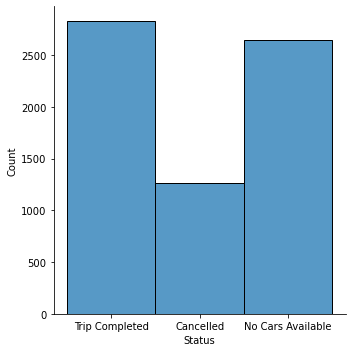

In [122]:
#bar plot for status
sns.displot(data["Status"],kde=False,bins=30)

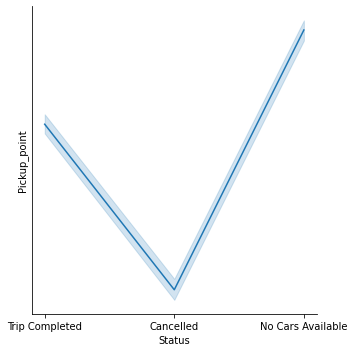

In [123]:
sns.relplot(x="Status", y="Pickup_point", kind="line", data=data)

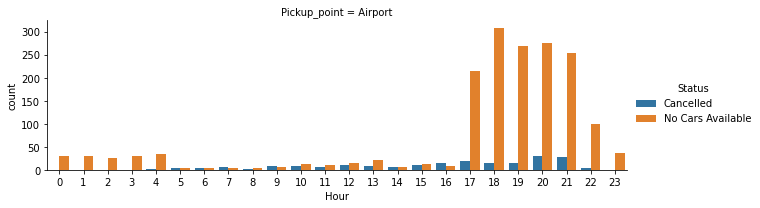

In [124]:
#FACTOR PLOT OR WE CAN SAY CATPLOT TO CHECK HOW UNAVAILABILITY OF CARS VARIES WITH HOURS AT AIRPORT
sns.catplot(x = "Hour", hue = "Status", row = "Pickup_point", data = data[(data['Pickup_point']=="Airport")&(data['Status']!='Trip Completed')], kind = "count", height=3, aspect=3)


In [125]:
#FINDING THE PERCENT OF TRIPS COMPLETED AND NOT COMPLETED
print("NO. OF TOTAL TRIPS ARE: ")
l=data["Request_id"].count()
print(data["Request_id"].count())

print("\nPERCENT OF TRIPS COMPLETED: ")
m=(data[data["Status"]=="Trip Completed"]["Request_id"].count()/l)*100
print((data[data["Status"]=="Trip Completed"]["Request_id"].count()/l)*100)

print("\nPERCENT OF TRIPS NOT COMPLETED:")
print(100-m)

NO. OF TOTAL TRIPS ARE: 
6745

PERCENT OF TRIPS COMPLETED: 
41.971830985915496

PERCENT OF TRIPS NOT COMPLETED:
58.028169014084504


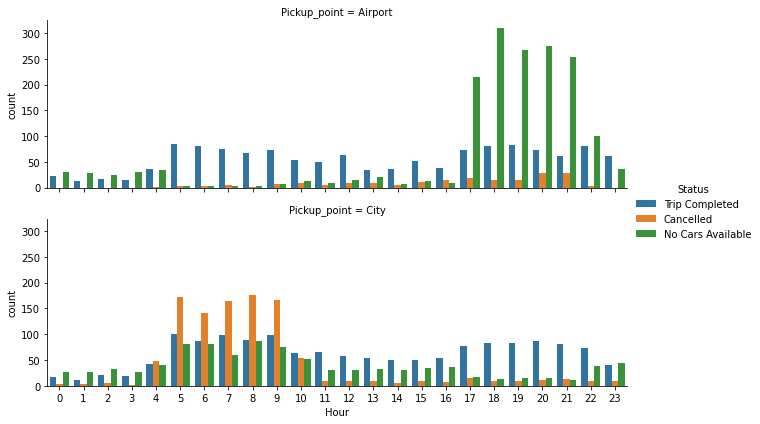

In [126]:
#CHECKING WITH RESPECT TO THE TIME HOW THE PICKUP POINT AND THE STATUS ARE COLLIDING
sns.catplot(x = "Hour", hue = "Status", row = "Pickup_point", data = data, kind = "count", height=3, aspect=3)

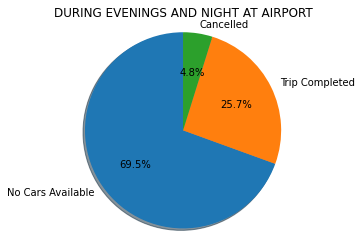

In [127]:
#CREATING PIE CHART FOR DEMAND SUPPLY
#CREATING DATAFRAME OF PICKUP POINT SPECIFICALLY AIRPORT AND SELECTING SLOTS OF EVENING AND NIGHT
d = pd.DataFrame(data[(data['Pickup_point']=='Airport')&((data['Slot']=="Evening")|(data['Slot']=="Night"))].Status.value_counts())

fig1, ax = plt.subplots()
ax.pie(d['Status'].values, labels=d.index.values, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title("DURING EVENINGS AND NIGHT AT AIRPORT")
plt.show()

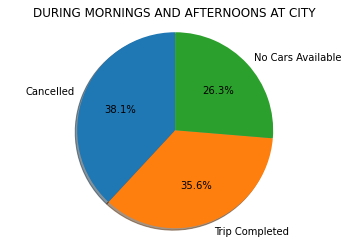

In [128]:
#DOING THE ABOVE SAME THING BUT THIS TIME FOR THE CITY and morning timings
c = pd.DataFrame(data[(data['Pickup_point']=='City')&((data['Slot']=="Morning")|(data['Slot']=="Afternoon"))].Status.value_counts())

fig1, ax = plt.subplots()
ax.pie(c['Status'].values, labels=c.index.values, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title("DURING MORNINGS AND AFTERNOONS AT CITY")
plt.show()

<AxesSubplot:xlabel='Hour', ylabel='Duration'>

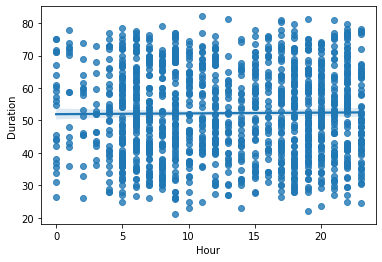

In [129]:
#FOLLOWING IS REPRESENTATION OF A SCATTERPLOT AND IT IS OF HOUR WRT DURATION OF THE TRIP
sns.regplot(x = "Hour", y = "Duration", data = data[(data['Duration']>0) & (data['Pickup_point']=='Airport')])


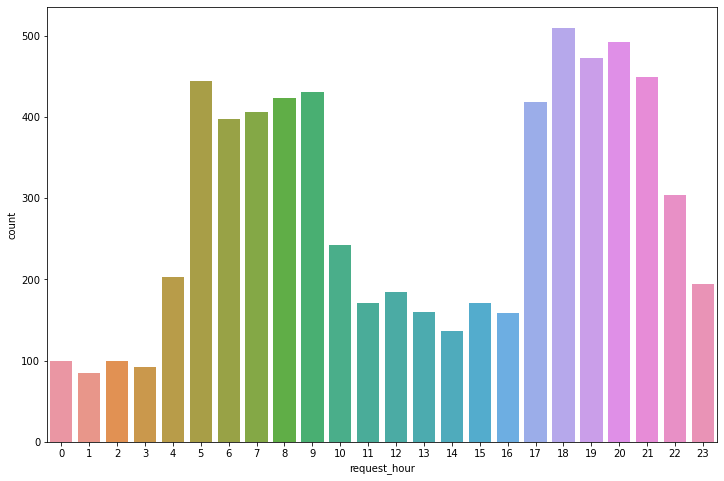

In [130]:
data['request_hour'] = data['Request_timestamp'].dt.hour
#LOOKING AT REQUEST HOUR
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(x='request_hour', data=data)
plt.show()

In [131]:
data.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Slot,Hour,Day,Duration,request_hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Morning,11,Monday,69.0,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Evening,17,Monday,50.0,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Morning,9,Tuesday,41.0,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Night,21,Tuesday,55.0,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning,8,Wednesday,52.5,8


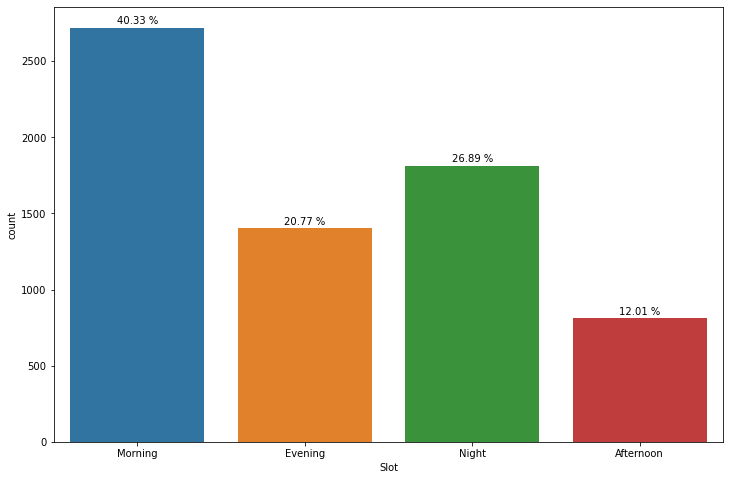

In [132]:
#using countplot to see the variation in rides as per the slots
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='b')
ax =sns.countplot(x='Slot', data=data)
total = len(data)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.4
    Y = p.get_height()+25
    ax.text(X, Y, '{:} %'.format(value), ha="center")
plt.show()

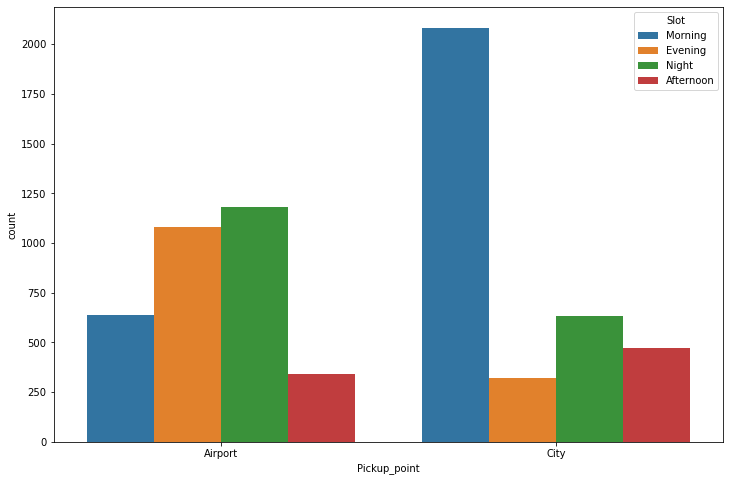

In [133]:
#HOW THE PICKUP POINT OF CITY AND AIRPORT VARIES ACCORDING TO TIME
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(x='Pickup_point', hue="Slot", data=data)
plt.show()

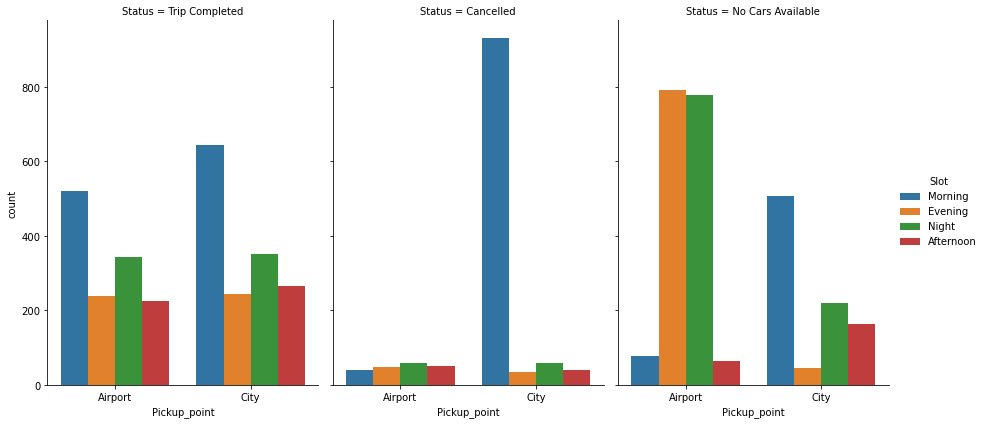

In [134]:
sns.catplot(x='Pickup_point',col="Status", hue = 'Slot',data=data ,kind="count",height=6,aspect= 0.7,ci=85,col_wrap=3,margin_titles=True)
plt.show()
#WE CAN SEE THAT MOST TRIPS ARE CANCELLED IN MORNING AT CITY POINT BUT THE TRIP COMPLETED RATE IS HIGH AT THAT TIME TOO THUS INDICATING THAT 
#A NUMBER OF REQUESTS ARE DONE IN MORNING AND THE CARS GET BUSY AT THAT TIME TOO.

# NOW WE SHALL BE LOOKING SPECIFICALLY AT THE DEMAND GAP ANOMALY

In [135]:
#FIRST OFF WE NEED TO CALCULATE THE DEMAND THEN SUPPLY AND THEN GAP
data.loc[(data.Status == 'Trip Completed') | (data.Status == 'Cancelled')| (data.Status == 'No Cars Available'), 'demand']="Demand"

data.loc[(data.Status == "Trip Completed"), 'supply'] = "Supply"

data.loc[(data.Status == 'Cancelled')| (data.Status == 'No Cars Available'),"gap"]="Gap"

In [136]:
print("The Supply is: {} \nThe Demand is: {} \nThe Gap is: {} ".format(data["supply"].count(),data["demand"].count(),data["gap"].count()))

The Supply is: 2831 
The Demand is: 6745 
The Gap is: 3914 


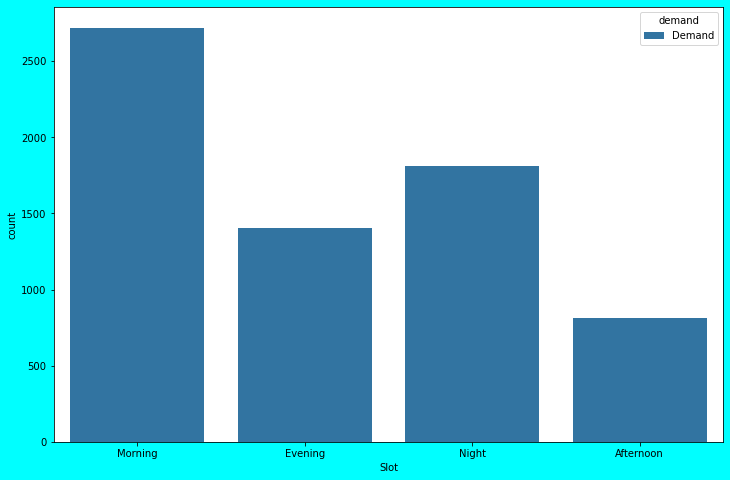

In [137]:
#DEMAND AS PER THE TIME SLOT
plt.figure(num=None, figsize=(12, 8), facecolor='cyan', edgecolor='b')
sns.countplot(hue='demand',x="Slot", data=data)
plt.show()

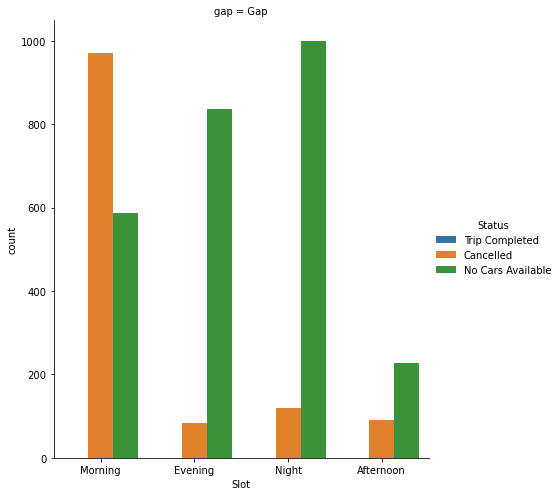

In [138]:
#SHOWING THE STATUS AS PER THE SLOT AND HOW THE GAP IS VARYING
sns.catplot(x='Slot',col="gap", hue = 'Status',data=data ,kind="count", height=7,aspect= 0.9,ci=85)
plt.show()

#WE CAN INFER FROM THIS THAT IN THE MORNING A NUMBER OF TRIPS ARE CANCELLED SHOWING HEAVY DEMAND
#AND AT NIGHT TIME CARS ARE UNAVAILABLE

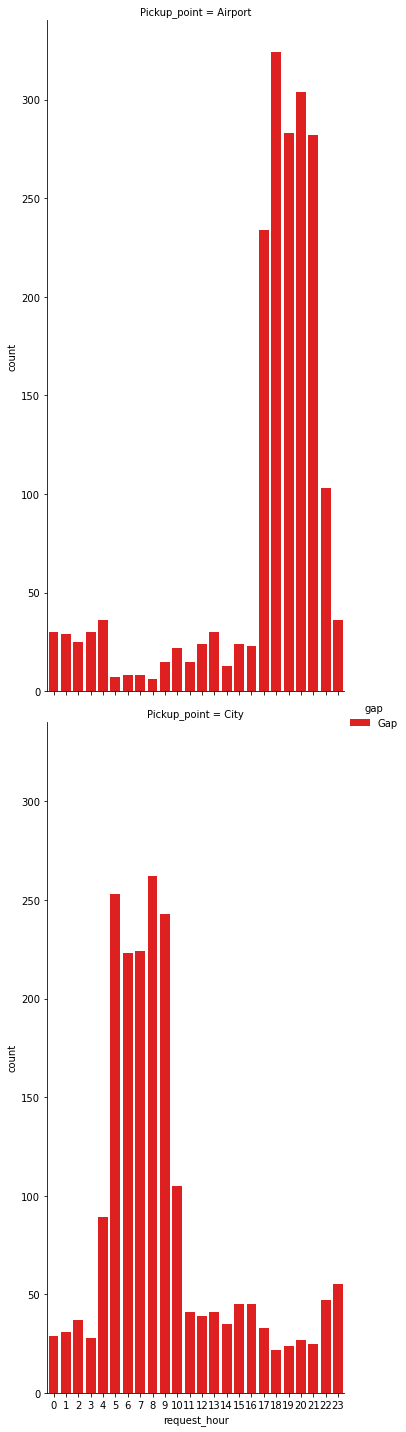

In [139]:
# GAP ACROSS THE REQUEST HOUR AND THE PICKUP POINT
sns.catplot(x='request_hour',col="Pickup_point", hue = 'gap',data=data ,kind="count", height=10,aspect= 0.5,ci=85,col_wrap=1,palette=sns.color_palette(['red']))
plt.show()

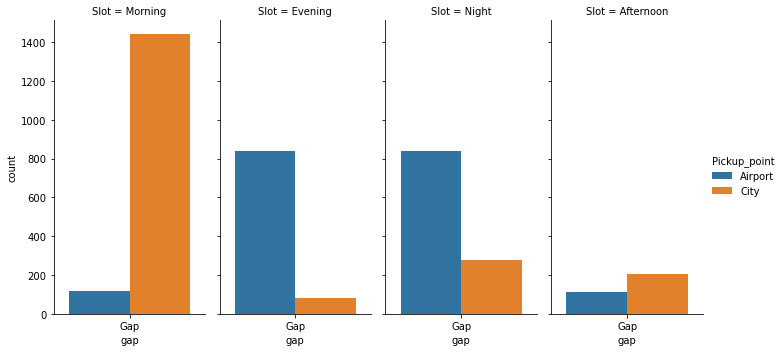

In [140]:
# GAP ACROSS THE PICKUP POINT AND THE SLOTS
sns.catplot(x='gap',col="Slot", hue = 'Pickup_point',data=data ,kind="count", height=5,aspect= 0.5,ci=85)
plt.show()

# CONCLUSION

## OBSERVATIONS MADE


### BASICALLY WE HAVE THE PROBLEMS REALTED TO THE UNAVAILABILITY OF THE CARS AND THE TRIPS GETTING CANCELLED:

### 1. AIRPORT TO CITY
    1.1 NO CARS AVAILABLE DURING EVENING TIMINGS.
    1.2 CANCELLATION OF TRIPS ARE LESSER FOR THE AIRPORT SIDE.
    1.3 WE CAN SEE THAT THE GAP FOR THE EVENING AND NIGHT SLOT AT AIRPORT IS BIG.
    1.4 IN MORNING SLOT THERE IS NO BIG DEMAND FOR CARS AT AIRPORT.
    
### 2. CITY TO AIRPORT
    2.1 A HUGE AMOUNT OF CANCELLATION IS DONE DURING THE MORNING TIMINGS.
    2.2 UNAVAILABILITY OF CARS IS ALSO AT THE MORNING SLOTS.
    2.3 HUGE GAP IN THE MORNING SLOT FOR CITY.
    2.4 IN EVENING AND NIGHT SLOTS THERE IS NO BIG DEMAND FOR CARS AT CITY.
    
### WE CAN OBSERVE THAT THERE IS A HUGE DEMAND IN MORNING TIMINGS FOR CITY AND A NUMBER OF CANCELLATIONS FOR EVENING AND NIGHTS AT AIRPORT


## SUGGESTIONS TO OVERCOME THE ISSUE

### TO OVERCOME "NO AVAILABILITY" DURING MORNINGS AT CITY:
    1. Provide incentive to drivers for extra morning trips for motivation.
    
### TO OVERCOME "NO AVAILABILITY" DURING EVENINGS AND NIGHTS AT AIRPORT:
    1. Assigning few extra cabs specially to the Airport trips.
    2. Provide incentive to drivers for Airport trips.
    3. A setting of advanced bookings would be beneficial.
    
### TO OVERCOME "CANCELLED" DURING MORNINGS AT CITY:
    1. Provide incentive to drivers for the trips.
    2. Imply penalty for cancelling a ride more than 3 times a day.